In [41]:
!pip install easyocr
!pip install imutils


You should consider upgrading via the 'C:\Users\user\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\user\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [42]:
import easyocr
from matplotlib import pyplot as pt
import numpy as np
import imutils
import cv2

In [95]:
img = cv2.imread("pinkcar.jpg")

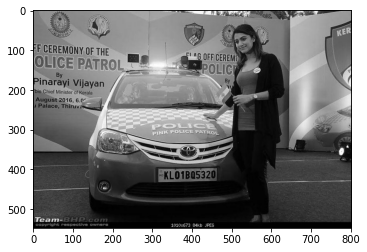

In [96]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
pt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

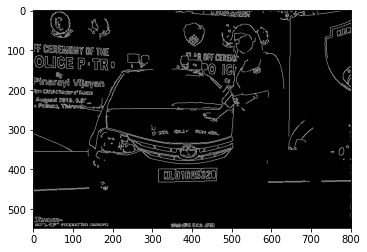

In [97]:
bifilter = cv2.bilateralFilter(gray,10,17,17)
edged = cv2.Canny(bifilter,500,200)
pt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))

In [98]:
keys = cv2.findContours(edged,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keys)
contours = sorted(contours,key = cv2.contourArea,reverse = True)[:50]

In [99]:
location=None
for contour in contours:
    approx = cv2.approxPolyDP(contour,10,True)
    if len(approx)==4:
        location = approx
        break
    

In [100]:
location

array([[[462, 397]],

       [[317, 399]],

       [[315, 432]],

       [[460, 429]]], dtype=int32)

In [101]:
mask = np.zeros(gray.shape,np.uint8)
new_img = cv2.drawContours(mask,[location],0,1,-1)


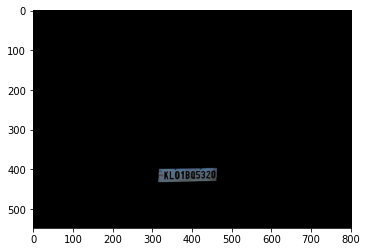

In [102]:
pt.imshow(new_img)
new_img = cv2.bitwise_and(img,img,mask=mask)
pt.imshow(new_img)


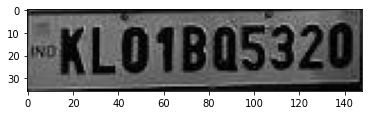

In [103]:
(x,y) =np.where(mask==1)
(x1,y1)=(np.min(x),np.min(y))
(x2,y2)=(np.max(x),np.max(y))
cropped = gray[x1:x2+1,y1:y2+1]
pt.imshow(cv2.cvtColor(cropped,cv2.COLOR_BGR2RGB))

In [104]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[9, 0], [148, 0], [148, 35], [9, 35]], 'KLO1B05320', 0.47689747942694277)]

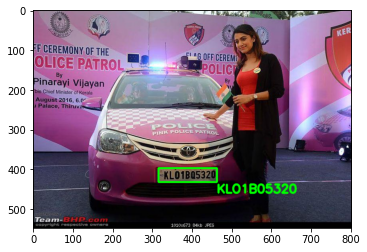

In [105]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res=cv2.putText(img,text = text,org=(approx[0][0][0],approx[1][0][1]+60),fontFace=font,fontScale=1,color=(0,255,0),thickness=3,lineType=cv2.LINE_AA)
res = cv2.rectangle(img,tuple(approx[0][0]),tuple(approx[2][0]),(0,255,0),3)
pt.imshow(cv2.cvtColor(res,cv2.COLOR_BGR2RGB))